In [ ]:
!pip install scikit-learn


In [ ]:
from sklearn.datasets import fetch_openml  #fetch_openml()


In [ ]:
!pip install pandas


In [ ]:
import warnings

import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier


In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784")


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
mnist


{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

In [ ]:
X,y=mnist['data'],mnist['target']


In [ ]:
X.shape


(70000, 784)

In [ ]:
y.shape


(70000,)

In [ ]:
%matplotlib inline


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout


In [ ]:
from keras.datasets import mnist


In [ ]:
mnist.load_data


<function keras.src.datasets.mnist.load_data(path='mnist.npz')>

In [ ]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()



11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
def plot_input_img(i):
    plt.imshow(X_train[i], cmap='binary')
    plt.title(y_train[i])
    plt.show()


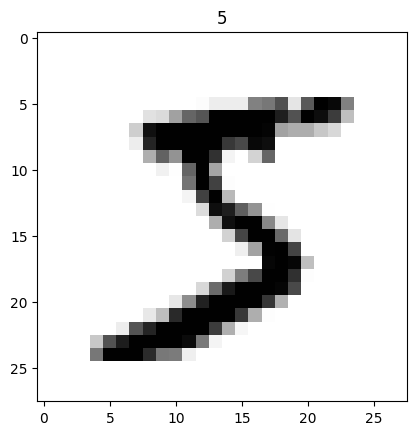

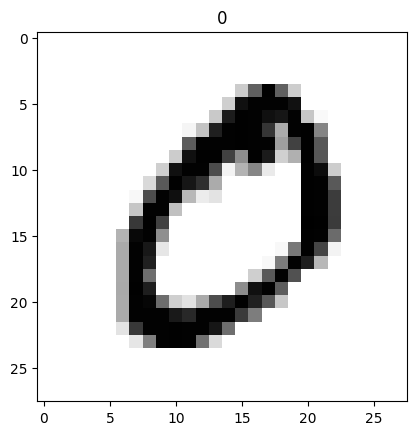

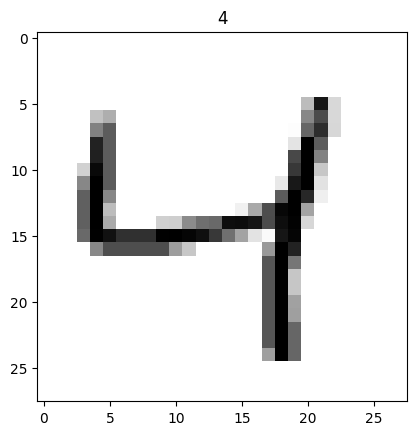

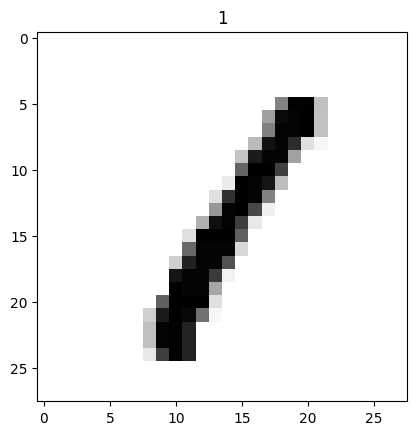

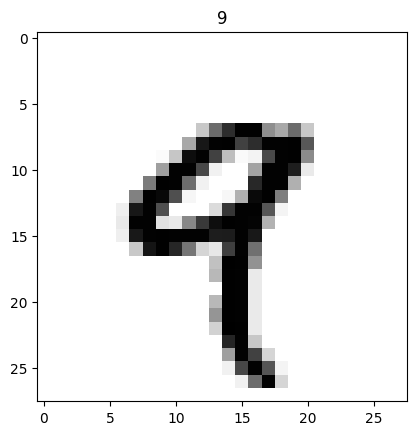

In [ ]:
for i in range(5):
    plot_input_img(i)


Preprocess the dataset

In [ ]:
#normalizing the image to [0, 1] range
X_train=X_train.astype(np.float32)/255
X_test=X_test.astype(np.float32)/255


In [ ]:
X_train=np.expand_dims(X_train, -1)  #expand
X_test=np.expand_dims(X_test, -1)   #(60000, 28, 28, 1)


In [ ]:
X_train.shape


(60000, 28, 28, 1)

OneHotVector

In [ ]:
y_train =keras.utils.to_categorical(y_train)


In [ ]:
y_train  #only whereever the value is present it will show the 1 there


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_test =keras.utils.to_categorical(y_test)


###To buils the model we have to import the libraries

In [ ]:
model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28,1), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'] )


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(monitor='val_acc', min_delta=0.01, patience=4, verbose=1)
mc = ModelCheckpoint(("./bestmodel.h5"), monitor="val_acc", verbose=1, save_best_only=True)


In [ ]:
model.fit(X_train, y_train, epochs=50, validation_split=0.3)


Epoch 1/50
1313/1313 [==============================] - 66s 48ms/step - loss: 0.2142 - accuracy: 0.9354 - val_loss: 0.0754 - val_accuracy: 0.9768
Epoch 2/50
1313/1313 [==============================] - 42s 32ms/step - loss: 0.0707 - accuracy: 0.9784 - val_loss: 0.0570 - val_accuracy: 0.9824
Epoch 3/50
1313/1313 [==============================] - 43s 33ms/step - loss: 0.0520 - accuracy: 0.9834 - val_loss: 0.0553 - val_accuracy: 0.9837
Epoch 4/50
1313/1313 [==============================] - 40s 31ms/step - loss: 0.0437 - accuracy: 0.9859 - val_loss: 0.0429 - val_accuracy: 0.9867
Epoch 5/50
1313/1313 [==============================] - 40s 31ms/step - loss: 0.0364 - accuracy: 0.9885 - val_loss: 0.0516 - val_accuracy: 0.9845
Epoch 6/50
1313/1313 [==============================] - 41s 31ms/step - loss: 0.0324 - accuracy: 0.9892 - val_loss: 0.0462 - val_accuracy: 0.9862
Epoch 7/50
1313/1313 [==============================] - 45s 35ms/step - loss: 0.0273 - accuracy: 0.9915 - val_loss: 0.0409 -

In [ ]:
model_s = model.save("./bestmodel.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_s=keras.models.load_model("./bestmodel.h5")

In [ ]:
score=model_s.evaluate(X_test, y_test)
print(f"the model accuracy is {score[1]}")

313/313 [==============================] - 3s 8ms/step - loss: 0.0497 - accuracy: 0.9910
the model accuracy is 0.9909999966621399


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Concatenate the training and testing data for cross-validation
X_all = np.concatenate((X_train, X_test), axis=0)
y_all = np.concatenate((y_train, y_test), axis=0)

# Define the number of folds for cross-validation
n_splits = 5  # You can adjust this based on your preference

# Initialize the StratifiedKFold object
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store accuracy for each fold
accuracies = []

# Iterate through the folds
for train_index, val_index in skf.split(X_all, np.argmax(y_all, axis=1)):
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_all[train_index], X_all[val_index]
    y_train_fold, y_val_fold = y_all[train_index], y_all[val_index]

    # Create a new model for each fold
    model = Sequential()
    model.add(Conv2D(32, (3,3), input_shape=(28, 28,1), activation='relu'))
    model.add(MaxPool2D((2, 2)))
    model.add(Conv2D(64, (3,3), activation='relu'))
    model.add(MaxPool2D((2, 2)))
    model.add(Flatten())
    model.add(Dropout(0.25))
    model.add(Dense(10, activation="softmax"))

    model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

    # Fit the model on the training data for this fold
    model.fit(X_train_fold, y_train_fold, epochs=50, validation_data=(X_val_fold, y_val_fold), callbacks=[es, mc])

    # Load the best model saved during training
    model.load_weights("./bestmodel.h5")

    # Evaluate the model on the validation set
    val_loss, val_acc = model.evaluate(X_val_fold, y_val_fold)
    accuracies.append(val_acc)

# Print the accuracies for each fold
for i, acc in enumerate(accuracies):
    print(f"Fold {i+1} Accuracy: {acc}")

# Print the average accuracy across all folds
print(f"Average Accuracy: {np.mean(accuracies)}")


Epoch 1/50
1750/1750 [==============================] - ETA: 0s - loss: 0.1779 - accuracy: 0.9455

1750/1750 [==============================] - 54s 30ms/step - loss: 0.1779 - accuracy: 0.9455 - val_loss: 0.0663 - val_accuracy: 0.9793
Epoch 2/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0633 - accuracy: 0.9800

1750/1750 [==============================] - 52s 30ms/step - loss: 0.0633 - accuracy: 0.9800 - val_loss: 0.0476 - val_accuracy: 0.9854
Epoch 3/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0469 - accuracy: 0.9852

1750/1750 [==============================] - 54s 31ms/step - loss: 0.0469 - accuracy: 0.9852 - val_loss: 0.0424 - val_accuracy: 0.9869
Epoch 4/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0390 - accuracy: 0.9881

1750/1750 [==============================] - 52s 30ms/step - loss: 0.0390 - accuracy: 0.9881 - val_loss: 0.0375 - val_accuracy: 0.9895
Epoch 5/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0332 - accuracy: 0.9895

1750/1750 [==============================] - 51s 29ms/step - loss: 0.0332 - accuracy: 0.9895 - val_loss: 0.0400 - val_accuracy: 0.9886
Epoch 6/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0291 - accuracy: 0.9902

1750/1750 [==============================] - 52s 30ms/step - loss: 0.0291 - accuracy: 0.9902 - val_loss: 0.0330 - val_accuracy: 0.9906
Epoch 7/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0263 - accuracy: 0.9917

1750/1750 [==============================] - 51s 29ms/step - loss: 0.0263 - accuracy: 0.9917 - val_loss: 0.0341 - val_accuracy: 0.9908
Epoch 8/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0221 - accuracy: 0.9927

1750/1750 [==============================] - 54s 31ms/step - loss: 0.0221 - accuracy: 0.9927 - val_loss: 0.0338 - val_accuracy: 0.9910
Epoch 9/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0201 - accuracy: 0.9934

1750/1750 [==============================] - 52s 30ms/step - loss: 0.0201 - accuracy: 0.9934 - val_loss: 0.0372 - val_accuracy: 0.9901
Epoch 10/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0174 - accuracy: 0.9940

1750/1750 [==============================] - 53s 30ms/step - loss: 0.0174 - accuracy: 0.9940 - val_loss: 0.0382 - val_accuracy: 0.9901
Epoch 11/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0186 - accuracy: 0.9937

1750/1750 [==============================] - 51s 29ms/step - loss: 0.0186 - accuracy: 0.9937 - val_loss: 0.0359 - val_accuracy: 0.9916
Epoch 12/50
1748/1750 [============================>.] - ETA: 0s - loss: 0.0157 - accuracy: 0.9948

1750/1750 [==============================] - 54s 31ms/step - loss: 0.0157 - accuracy: 0.9948 - val_loss: 0.0342 - val_accuracy: 0.9915
Epoch 13/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0151 - accuracy: 0.9948

1750/1750 [==============================] - 52s 29ms/step - loss: 0.0151 - accuracy: 0.9948 - val_loss: 0.0376 - val_accuracy: 0.9906
Epoch 14/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0142 - accuracy: 0.9953

1750/1750 [==============================] - 52s 30ms/step - loss: 0.0142 - accuracy: 0.9953 - val_loss: 0.0392 - val_accuracy: 0.9900
Epoch 15/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0145 - accuracy: 0.9952

1750/1750 [==============================] - 54s 31ms/step - loss: 0.0145 - accuracy: 0.9952 - val_loss: 0.0347 - val_accuracy: 0.9912
Epoch 16/50
1748/1750 [============================>.] - ETA: 0s - loss: 0.0130 - accuracy: 0.9957

1750/1750 [==============================] - 51s 29ms/step - loss: 0.0129 - accuracy: 0.9957 - val_loss: 0.0375 - val_accuracy: 0.9903
Epoch 17/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0131 - accuracy: 0.9956

1750/1750 [==============================] - 53s 30ms/step - loss: 0.0131 - accuracy: 0.9956 - val_loss: 0.0333 - val_accuracy: 0.9915
Epoch 18/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0109 - accuracy: 0.9960

1750/1750 [==============================] - 52s 30ms/step - loss: 0.0109 - accuracy: 0.9960 - val_loss: 0.0338 - val_accuracy: 0.9913
Epoch 19/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0115 - accuracy: 0.9957

1750/1750 [==============================] - 54s 31ms/step - loss: 0.0115 - accuracy: 0.9957 - val_loss: 0.0355 - val_accuracy: 0.9912
Epoch 20/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0094 - accuracy: 0.9967

1750/1750 [==============================] - 53s 30ms/step - loss: 0.0094 - accuracy: 0.9967 - val_loss: 0.0388 - val_accuracy: 0.9912
Epoch 21/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0108 - accuracy: 0.9961

1750/1750 [==============================] - 56s 32ms/step - loss: 0.0108 - accuracy: 0.9961 - val_loss: 0.0335 - val_accuracy: 0.9924
Epoch 22/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0098 - accuracy: 0.9966

1750/1750 [==============================] - 53s 31ms/step - loss: 0.0098 - accuracy: 0.9966 - val_loss: 0.0374 - val_accuracy: 0.9919
Epoch 23/50
1748/1750 [============================>.] - ETA: 0s - loss: 0.0100 - accuracy: 0.9965

1750/1750 [==============================] - 53s 30ms/step - loss: 0.0100 - accuracy: 0.9965 - val_loss: 0.0374 - val_accuracy: 0.9916
Epoch 24/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0089 - accuracy: 0.9971

1750/1750 [==============================] - 53s 30ms/step - loss: 0.0089 - accuracy: 0.9971 - val_loss: 0.0385 - val_accuracy: 0.9912
Epoch 25/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0082 - accuracy: 0.9971

1750/1750 [==============================] - 50s 29ms/step - loss: 0.0082 - accuracy: 0.9971 - val_loss: 0.0431 - val_accuracy: 0.9914
Epoch 26/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0077 - accuracy: 0.9971

1750/1750 [==============================] - 52s 30ms/step - loss: 0.0077 - accuracy: 0.9971 - val_loss: 0.0403 - val_accuracy: 0.9918
Epoch 27/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0079 - accuracy: 0.9973

1750/1750 [==============================] - 52s 30ms/step - loss: 0.0079 - accuracy: 0.9973 - val_loss: 0.0427 - val_accuracy: 0.9916
Epoch 28/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0076 - accuracy: 0.9974

1750/1750 [==============================] - 50s 29ms/step - loss: 0.0076 - accuracy: 0.9974 - val_loss: 0.0416 - val_accuracy: 0.9927
Epoch 29/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0086 - accuracy: 0.9971

1750/1750 [==============================] - 54s 31ms/step - loss: 0.0086 - accuracy: 0.9971 - val_loss: 0.0445 - val_accuracy: 0.9905
Epoch 30/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0080 - accuracy: 0.9972

1750/1750 [==============================] - 54s 31ms/step - loss: 0.0080 - accuracy: 0.9972 - val_loss: 0.0363 - val_accuracy: 0.9922
Epoch 31/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0072 - accuracy: 0.9977

1750/1750 [==============================] - 53s 30ms/step - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.0450 - val_accuracy: 0.9914
Epoch 32/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0072 - accuracy: 0.9973

1750/1750 [==============================] - 52s 30ms/step - loss: 0.0072 - accuracy: 0.9973 - val_loss: 0.0495 - val_accuracy: 0.9915
Epoch 33/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0078 - accuracy: 0.9974

1750/1750 [==============================] - 53s 30ms/step - loss: 0.0078 - accuracy: 0.9974 - val_loss: 0.0432 - val_accuracy: 0.9913
Epoch 34/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0057 - accuracy: 0.9981

1750/1750 [==============================] - 53s 30ms/step - loss: 0.0057 - accuracy: 0.9981 - val_loss: 0.0517 - val_accuracy: 0.9906
Epoch 35/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0075 - accuracy: 0.9976

1750/1750 [==============================] - 54s 31ms/step - loss: 0.0075 - accuracy: 0.9976 - val_loss: 0.0419 - val_accuracy: 0.9920
Epoch 36/50
1748/1750 [============================>.] - ETA: 0s - loss: 0.0063 - accuracy: 0.9977

1750/1750 [==============================] - 52s 30ms/step - loss: 0.0063 - accuracy: 0.9977 - val_loss: 0.0492 - val_accuracy: 0.9916
Epoch 37/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0074 - accuracy: 0.9973

1750/1750 [==============================] - 50s 29ms/step - loss: 0.0074 - accuracy: 0.9973 - val_loss: 0.0480 - val_accuracy: 0.9911
Epoch 38/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0064 - accuracy: 0.9979

1750/1750 [==============================] - 54s 31ms/step - loss: 0.0064 - accuracy: 0.9979 - val_loss: 0.0464 - val_accuracy: 0.9923
Epoch 39/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0069 - accuracy: 0.9978

1750/1750 [==============================] - 54s 31ms/step - loss: 0.0069 - accuracy: 0.9978 - val_loss: 0.0448 - val_accuracy: 0.9923
Epoch 40/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0061 - accuracy: 0.9981

1750/1750 [==============================] - 52s 29ms/step - loss: 0.0061 - accuracy: 0.9981 - val_loss: 0.0458 - val_accuracy: 0.9914
Epoch 41/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0058 - accuracy: 0.9980

1750/1750 [==============================] - 51s 29ms/step - loss: 0.0058 - accuracy: 0.9980 - val_loss: 0.0453 - val_accuracy: 0.9913
Epoch 42/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0056 - accuracy: 0.9982

1750/1750 [==============================] - 50s 28ms/step - loss: 0.0056 - accuracy: 0.9982 - val_loss: 0.0531 - val_accuracy: 0.9916
Epoch 43/50
1748/1750 [============================>.] - ETA: 0s - loss: 0.0060 - accuracy: 0.9979

1750/1750 [==============================] - 49s 28ms/step - loss: 0.0060 - accuracy: 0.9979 - val_loss: 0.0508 - val_accuracy: 0.9921
Epoch 44/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0051 - accuracy: 0.9982

1750/1750 [==============================] - 48s 27ms/step - loss: 0.0051 - accuracy: 0.9982 - val_loss: 0.0546 - val_accuracy: 0.9907
Epoch 45/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0076 - accuracy: 0.9973

1750/1750 [==============================] - 50s 29ms/step - loss: 0.0076 - accuracy: 0.9973 - val_loss: 0.0560 - val_accuracy: 0.9910
Epoch 46/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0064 - accuracy: 0.9978

1750/1750 [==============================] - 48s 27ms/step - loss: 0.0064 - accuracy: 0.9978 - val_loss: 0.0461 - val_accuracy: 0.9923
Epoch 47/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 0.9978

1750/1750 [==============================] - 49s 28ms/step - loss: 0.0066 - accuracy: 0.9978 - val_loss: 0.0503 - val_accuracy: 0.9916
Epoch 48/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0048 - accuracy: 0.9984

1750/1750 [==============================] - 52s 29ms/step - loss: 0.0049 - accuracy: 0.9984 - val_loss: 0.0516 - val_accuracy: 0.9919
Epoch 49/50
1748/1750 [============================>.] - ETA: 0s - loss: 0.0058 - accuracy: 0.9983

1750/1750 [==============================] - 49s 28ms/step - loss: 0.0058 - accuracy: 0.9983 - val_loss: 0.0493 - val_accuracy: 0.9916
Epoch 50/50
1748/1750 [============================>.] - ETA: 0s - loss: 0.0054 - accuracy: 0.9980

438/438 [==============================] - 4s 8ms/step - loss: 0.0162 - accuracy: 0.9965
Epoch 1/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.1837 - accuracy: 0.9447

1750/1750 [==============================] - 52s 29ms/step - loss: 0.1837 - accuracy: 0.9447 - val_loss: 0.0643 - val_accuracy: 0.9801
Epoch 2/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0603 - accuracy: 0.9812

1750/1750 [==============================] - 51s 29ms/step - loss: 0.0602 - accuracy: 0.9812 - val_loss: 0.0436 - val_accuracy: 0.9857
Epoch 3/50
1748/1750 [============================>.] - ETA: 0s - loss: 0.0493 - accuracy: 0.9848

1750/1750 [==============================] - 51s 29ms/step - loss: 0.0493 - accuracy: 0.9848 - val_loss: 0.0382 - val_accuracy: 0.9874
Epoch 4/50
1748/1750 [============================>.] - ETA: 0s - loss: 0.0384 - accuracy: 0.9880

1750/1750 [==============================] - 50s 28ms/step - loss: 0.0384 - accuracy: 0.9879 - val_loss: 0.0381 - val_accuracy: 0.9881
Epoch 5/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0332 - accuracy: 0.9897

1750/1750 [==============================] - 52s 29ms/step - loss: 0.0332 - accuracy: 0.9897 - val_loss: 0.0328 - val_accuracy: 0.9897
Epoch 6/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0282 - accuracy: 0.9910

1750/1750 [==============================] - 51s 29ms/step - loss: 0.0282 - accuracy: 0.9910 - val_loss: 0.0374 - val_accuracy: 0.9883
Epoch 7/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0258 - accuracy: 0.9916

1750/1750 [==============================] - 49s 28ms/step - loss: 0.0258 - accuracy: 0.9916 - val_loss: 0.0322 - val_accuracy: 0.9901
Epoch 8/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0228 - accuracy: 0.9923

1750/1750 [==============================] - 48s 28ms/step - loss: 0.0228 - accuracy: 0.9923 - val_loss: 0.0336 - val_accuracy: 0.9896
Epoch 9/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0214 - accuracy: 0.9927

1750/1750 [==============================] - 49s 28ms/step - loss: 0.0214 - accuracy: 0.9927 - val_loss: 0.0315 - val_accuracy: 0.9901
Epoch 10/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0190 - accuracy: 0.9939

1750/1750 [==============================] - 49s 28ms/step - loss: 0.0190 - accuracy: 0.9939 - val_loss: 0.0335 - val_accuracy: 0.9903
Epoch 11/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0177 - accuracy: 0.9943

1750/1750 [==============================] - 50s 29ms/step - loss: 0.0177 - accuracy: 0.9943 - val_loss: 0.0390 - val_accuracy: 0.9886
Epoch 12/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0152 - accuracy: 0.9950

1750/1750 [==============================] - 50s 28ms/step - loss: 0.0152 - accuracy: 0.9950 - val_loss: 0.0329 - val_accuracy: 0.9899
Epoch 13/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 0.9950

1750/1750 [==============================] - 49s 28ms/step - loss: 0.0147 - accuracy: 0.9950 - val_loss: 0.0315 - val_accuracy: 0.9914
Epoch 14/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0148 - accuracy: 0.9949

1750/1750 [==============================] - 50s 28ms/step - loss: 0.0148 - accuracy: 0.9949 - val_loss: 0.0315 - val_accuracy: 0.9906
Epoch 15/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0134 - accuracy: 0.9954

1750/1750 [==============================] - 50s 29ms/step - loss: 0.0134 - accuracy: 0.9954 - val_loss: 0.0370 - val_accuracy: 0.9901
Epoch 16/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0125 - accuracy: 0.9957

1750/1750 [==============================] - 50s 29ms/step - loss: 0.0125 - accuracy: 0.9957 - val_loss: 0.0355 - val_accuracy: 0.9909
Epoch 17/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0111 - accuracy: 0.9962

1750/1750 [==============================] - 48s 27ms/step - loss: 0.0111 - accuracy: 0.9962 - val_loss: 0.0331 - val_accuracy: 0.9909
Epoch 18/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0122 - accuracy: 0.9958

1750/1750 [==============================] - 49s 28ms/step - loss: 0.0122 - accuracy: 0.9958 - val_loss: 0.0328 - val_accuracy: 0.9909
Epoch 19/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0111 - accuracy: 0.9961

1750/1750 [==============================] - 51s 29ms/step - loss: 0.0111 - accuracy: 0.9961 - val_loss: 0.0339 - val_accuracy: 0.9910
Epoch 20/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0107 - accuracy: 0.9963

1750/1750 [==============================] - 50s 29ms/step - loss: 0.0107 - accuracy: 0.9963 - val_loss: 0.0336 - val_accuracy: 0.9911
Epoch 21/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0099 - accuracy: 0.9967

1750/1750 [==============================] - 51s 29ms/step - loss: 0.0099 - accuracy: 0.9967 - val_loss: 0.0356 - val_accuracy: 0.9913
Epoch 22/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0092 - accuracy: 0.9968

1750/1750 [==============================] - 49s 28ms/step - loss: 0.0092 - accuracy: 0.9968 - val_loss: 0.0378 - val_accuracy: 0.9911
Epoch 23/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0081 - accuracy: 0.9973

1750/1750 [==============================] - 49s 28ms/step - loss: 0.0081 - accuracy: 0.9973 - val_loss: 0.0381 - val_accuracy: 0.9911
Epoch 24/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0102 - accuracy: 0.9967

1750/1750 [==============================] - 49s 28ms/step - loss: 0.0102 - accuracy: 0.9967 - val_loss: 0.0363 - val_accuracy: 0.9911
Epoch 25/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0082 - accuracy: 0.9971

1750/1750 [==============================] - 50s 29ms/step - loss: 0.0082 - accuracy: 0.9971 - val_loss: 0.0335 - val_accuracy: 0.9916
Epoch 26/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0086 - accuracy: 0.9972

1750/1750 [==============================] - 51s 29ms/step - loss: 0.0086 - accuracy: 0.9972 - val_loss: 0.0361 - val_accuracy: 0.9904
Epoch 27/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0085 - accuracy: 0.9970

1750/1750 [==============================] - 50s 28ms/step - loss: 0.0085 - accuracy: 0.9970 - val_loss: 0.0354 - val_accuracy: 0.9916
Epoch 28/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0081 - accuracy: 0.9973

1750/1750 [==============================] - 50s 29ms/step - loss: 0.0081 - accuracy: 0.9973 - val_loss: 0.0340 - val_accuracy: 0.9920
Epoch 29/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0072 - accuracy: 0.9973

1750/1750 [==============================] - 49s 28ms/step - loss: 0.0072 - accuracy: 0.9973 - val_loss: 0.0442 - val_accuracy: 0.9905
Epoch 30/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0066 - accuracy: 0.9976

1750/1750 [==============================] - 49s 28ms/step - loss: 0.0066 - accuracy: 0.9976 - val_loss: 0.0413 - val_accuracy: 0.9902
Epoch 31/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0063 - accuracy: 0.9979

1750/1750 [==============================] - 49s 28ms/step - loss: 0.0063 - accuracy: 0.9979 - val_loss: 0.0380 - val_accuracy: 0.9906
Epoch 32/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0074 - accuracy: 0.9974

1750/1750 [==============================] - 53s 31ms/step - loss: 0.0074 - accuracy: 0.9974 - val_loss: 0.0454 - val_accuracy: 0.9898
Epoch 33/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0063 - accuracy: 0.9978

1750/1750 [==============================] - 51s 29ms/step - loss: 0.0063 - accuracy: 0.9978 - val_loss: 0.0393 - val_accuracy: 0.9911
Epoch 34/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0079 - accuracy: 0.9974

1750/1750 [==============================] - 51s 29ms/step - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.0427 - val_accuracy: 0.9902
Epoch 35/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0063 - accuracy: 0.9978

1750/1750 [==============================] - 50s 28ms/step - loss: 0.0063 - accuracy: 0.9978 - val_loss: 0.0390 - val_accuracy: 0.9918
Epoch 36/50
1748/1750 [============================>.] - ETA: 0s - loss: 0.0060 - accuracy: 0.9979

1750/1750 [==============================] - 51s 29ms/step - loss: 0.0060 - accuracy: 0.9979 - val_loss: 0.0458 - val_accuracy: 0.9913
Epoch 37/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0072 - accuracy: 0.9975

1750/1750 [==============================] - 49s 28ms/step - loss: 0.0072 - accuracy: 0.9975 - val_loss: 0.0400 - val_accuracy: 0.9914
Epoch 38/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0060 - accuracy: 0.9978

1750/1750 [==============================] - 50s 29ms/step - loss: 0.0060 - accuracy: 0.9978 - val_loss: 0.0433 - val_accuracy: 0.9909
Epoch 39/50
1748/1750 [============================>.] - ETA: 0s - loss: 0.0070 - accuracy: 0.9977

1750/1750 [==============================] - 48s 27ms/step - loss: 0.0070 - accuracy: 0.9977 - val_loss: 0.0403 - val_accuracy: 0.9904
Epoch 40/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0056 - accuracy: 0.9981

1750/1750 [==============================] - 48s 28ms/step - loss: 0.0056 - accuracy: 0.9981 - val_loss: 0.0463 - val_accuracy: 0.9906
Epoch 41/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0060 - accuracy: 0.9981

1750/1750 [==============================] - 51s 29ms/step - loss: 0.0060 - accuracy: 0.9981 - val_loss: 0.0480 - val_accuracy: 0.9909
Epoch 42/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0052 - accuracy: 0.9982

1750/1750 [==============================] - 48s 28ms/step - loss: 0.0052 - accuracy: 0.9982 - val_loss: 0.0446 - val_accuracy: 0.9920
Epoch 43/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0059 - accuracy: 0.9980

1750/1750 [==============================] - 50s 29ms/step - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0.0457 - val_accuracy: 0.9906
Epoch 44/50
1748/1750 [============================>.] - ETA: 0s - loss: 0.0049 - accuracy: 0.9984

1750/1750 [==============================] - 49s 28ms/step - loss: 0.0049 - accuracy: 0.9984 - val_loss: 0.0447 - val_accuracy: 0.9914
Epoch 45/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0064 - accuracy: 0.9977

1750/1750 [==============================] - 51s 29ms/step - loss: 0.0064 - accuracy: 0.9977 - val_loss: 0.0494 - val_accuracy: 0.9911
Epoch 46/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0055 - accuracy: 0.9981

1750/1750 [==============================] - 49s 28ms/step - loss: 0.0055 - accuracy: 0.9981 - val_loss: 0.0438 - val_accuracy: 0.9914
Epoch 47/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0051 - accuracy: 0.9983

1750/1750 [==============================] - 49s 28ms/step - loss: 0.0051 - accuracy: 0.9983 - val_loss: 0.0526 - val_accuracy: 0.9902
Epoch 48/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0058 - accuracy: 0.9978

1750/1750 [==============================] - 49s 28ms/step - loss: 0.0058 - accuracy: 0.9978 - val_loss: 0.0502 - val_accuracy: 0.9909
Epoch 49/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0058 - accuracy: 0.9978

1750/1750 [==============================] - 49s 28ms/step - loss: 0.0058 - accuracy: 0.9978 - val_loss: 0.0545 - val_accuracy: 0.9904
Epoch 50/50
1748/1750 [============================>.] - ETA: 0s - loss: 0.0067 - accuracy: 0.9978

438/438 [==============================] - 4s 8ms/step - loss: 0.0198 - accuracy: 0.9961
Epoch 1/50
1750/1750 [==============================] - ETA: 0s - loss: 0.1850 - accuracy: 0.9438

1750/1750 [==============================] - 53s 30ms/step - loss: 0.1850 - accuracy: 0.9438 - val_loss: 0.0763 - val_accuracy: 0.9759
Epoch 2/50
1750/1750 [==============================] - ETA: 0s - loss: 0.0651 - accuracy: 0.9795

1750/1750 [==============================] - 50s 29ms/step - loss: 0.0651 - accuracy: 0.9795 - val_loss: 0.0605 - val_accuracy: 0.9807
Epoch 3/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0482 - accuracy: 0.9850

1750/1750 [==============================] - 51s 29ms/step - loss: 0.0482 - accuracy: 0.9850 - val_loss: 0.0476 - val_accuracy: 0.9850
Epoch 4/50
1749/1750 [============================>.] - ETA: 0s - loss: 0.0403 - accuracy: 0.9873

1750/1750 [==============================] - 52s 30ms/step - loss: 0.0403 - accuracy: 0.9873 - val_loss: 0.0413 - val_accuracy: 0.9874
Epoch 5/50
1416/1750 [=======================>......] - ETA: 9s - loss: 0.0344 - accuracy: 0.9893